In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
from scipy.stats import median_abs_deviation as mad

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

In [5]:
import pymc3 as pm

# Regression with interactions

In [6]:
b = [1,2,-1,-2]

In [7]:
z = np.random.randint(0,2,100)
x = np.random.normal(z,1)

In [8]:
error = np.random.normal(size=100)

In [9]:
y = b[0]+b[1]*x+b[2]*z+b[3]*x*z + error

In [10]:
y_z0 = []
y_z1 = []
x_z0 = []
x_z1 = []
for i in range(0, len(z)):
    if z[i] == 0:
        y_z0.append(y[i])
        x_z0.append(x[i])
    else:
        y_z1.append(y[i])
        x_z1.append(x[i])

In [11]:
df = pd.DataFrame({'x':x, 'y':y, 'z':z})

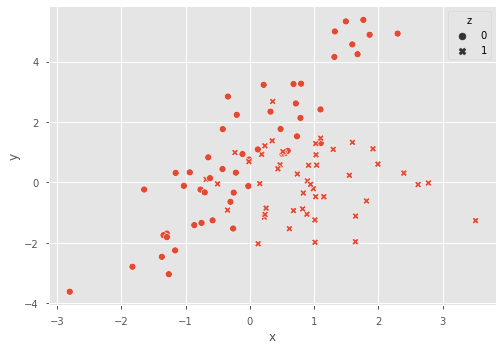

In [12]:
sns.scatterplot(x = 'x', y = 'y', style='z', data = df)

In [13]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('y~x+z', df)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, z, x, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 9 seconds.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd33d5f6b50>,
      dtype=object)

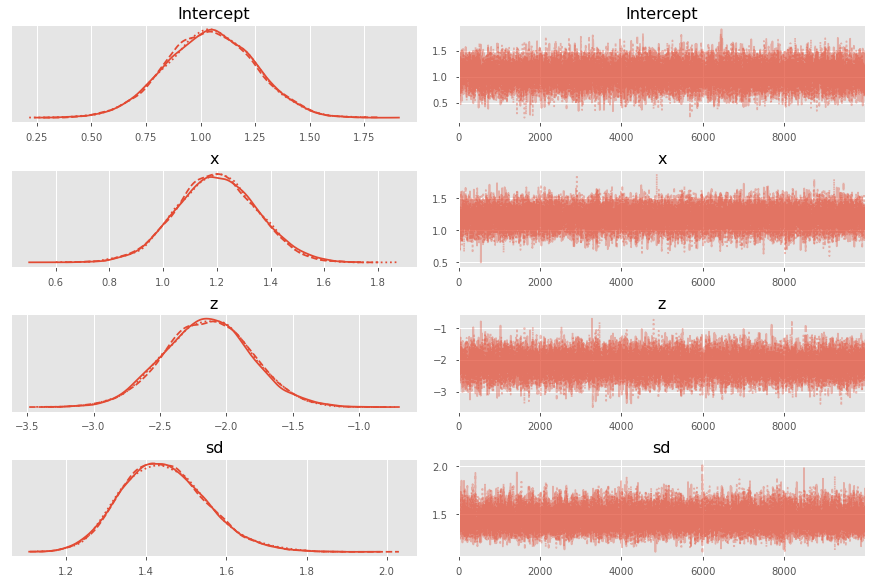

In [14]:
pm.traceplot(trace)

In [15]:
intercept = np.mean(trace[:3000]['Intercept'])
intercept

1.0430683878065352

In [16]:
slope_x = np.mean(trace[:3000]['x'])
slope_x

1.1976364681072615

In [17]:
slope_z = np.mean(trace[:3000]['z'])
slope_z

-2.1428139742309664

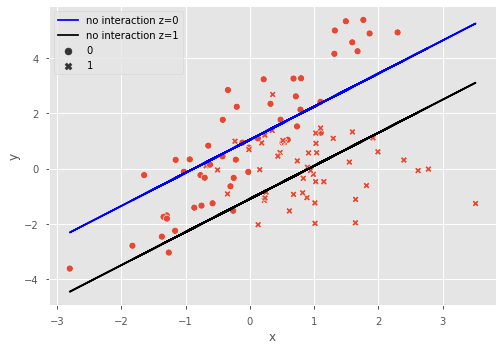

In [18]:
sns.scatterplot(x = 'x', y = 'y', style='z', data = df)
plt.plot(df['x'], intercept+slope_x*df['x'], color='b', label='no interaction z=0')
plt.plot(df['x'],intercept+slope_x*df['x']+slope_z, color='k', label='no interaction z=1')
plt.legend()

With interactions

In [19]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('y~x+z+x:z', df)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, x:z, z, x, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 11 seconds.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd33d8c5550>,
      dtype=object)

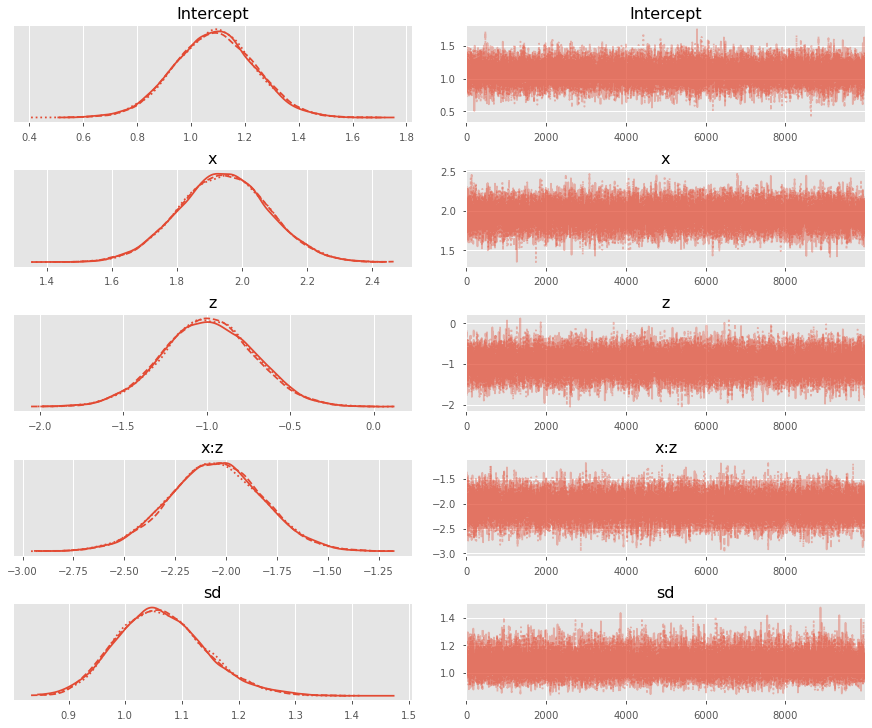

In [20]:
pm.traceplot(trace)

In [21]:
intercept = np.mean(trace[:3000]['Intercept'])
slope_x = np.mean(trace[:3000]['x'])
slope_z = np.mean(trace[:3000]['z'])
slope_xz = np.mean(trace[:3000]['x:z'])

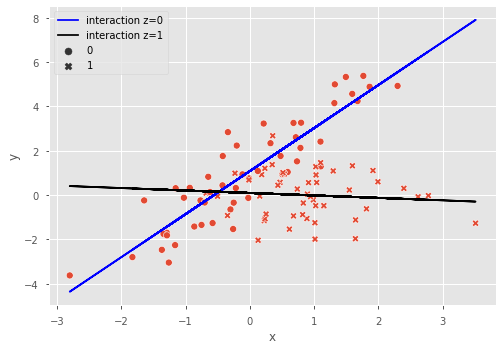

In [22]:
sns.scatterplot(x = 'x', y = 'y', style='z', data = df)
plt.plot(df['x'], intercept+slope_x*df['x'], color='b', label='interaction z=0')
plt.plot(df['x'],intercept+slope_x*df['x']+slope_z+slope_xz*df['x'], color='k', label='interaction z=1')
plt.legend()

# 10.3 Checking statistical significance

In [23]:
var1 = np.random.normal(size=1000)
var2 = np.random.normal(size=1000)

In [24]:
df2 = pd.DataFrame({'var1':var1, 'var2':var2})

In [25]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('var2~var1', df2)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd334125910>,
      dtype=object)

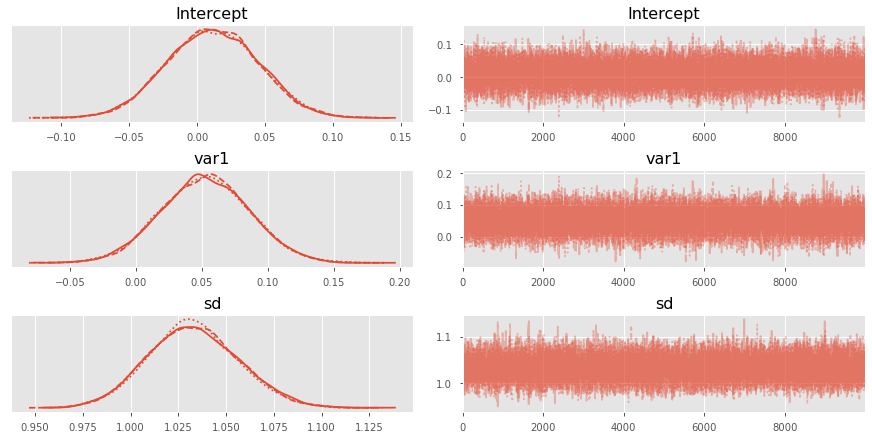

In [26]:
pm.plot_trace(trace)

In [27]:
var1_slope = np.mean(trace[:3000]['var1'])

In [28]:
var1_slope

0.05241859933528973

In [29]:
std = np.std(trace[:3000]['var1'])

In [30]:
std

0.03378590170062849

In [31]:
z_score = -var1_slope/(std)

In [32]:
z_score

-1.5514932766857197

In [33]:
1-stats.norm.cdf(z_score)

0.939608241340236

It is not statistically significant

# 10.4 Simulation Study of Statistical Significance

In [34]:
z_score_list = []

for i in range(0,100):
    var1 = np.random.normal(size=1000)
    var2 = np.random.normal(size=1000)
    df2 = pd.DataFrame({'var1':var1, 'var2':var2})
    with pm.Model() as model:
        pm.glm.linear.GLM.from_formula('var2~var1', df2)
        trace = pm.sample(10000)
    var1_slope = np.mean(trace[:3000]['var1'])
    std = np.std(trace[:3000]['var1'])
    z_score = -var1_slope/(std)
    z_score_list.append(z_score)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 7 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, var1, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.


In [35]:
len([x for x in z_score_list if abs(x)>2])

3

Not statistically significant

# 10.5 Regression modeling and prediction

In [36]:
kidiq = pd.read_csv('../ROS-Examples/KidIQ/data/kidiq.csv')

In [37]:
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [38]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('kid_score~mom_age', kidiq)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, mom_age, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 26 seconds.
The acceptance probability does not match the target. It is 0.8805715220983197, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8966298289042987, but should be close to 0.8. Try to increase the number of tuning steps.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd32ec7bc40>,
      dtype=object)

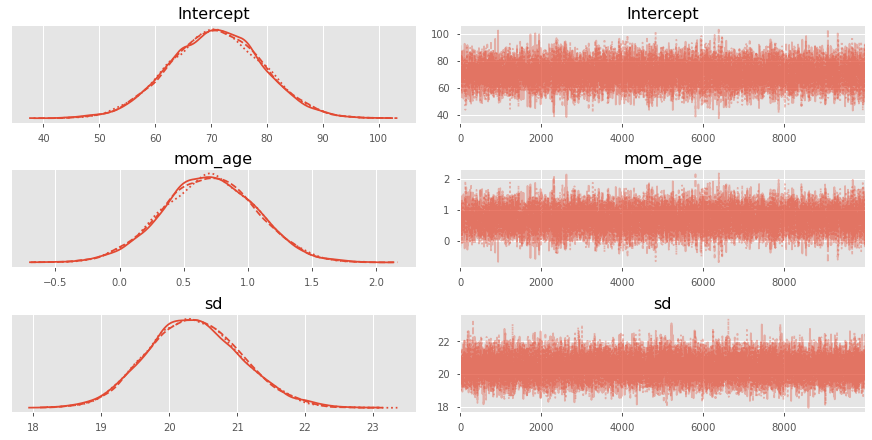

In [39]:
pm.plot_trace(trace)

In [40]:
slope = trace[:3000]['mom_age'].mean()
intercept = trace[:3000]['Intercept'].mean()

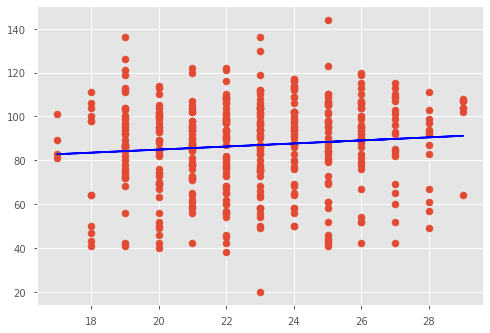

In [41]:
plt.scatter(kidiq['mom_age'], kidiq['kid_score'])
plt.plot(kidiq['mom_age'], slope*kidiq['mom_age']+intercept, color='b')

In [42]:
slope

0.6990381455281135

If we compare average child test scores for subpopulations that differ in maternal age by 1 year, then we expect to see that group with with higher mother's age by 0.7 points on average

with this analysis it would seem that mothers should give birth as late as possible, the assumpition is that the maternal age is the only factor in this relationship (that and this fit is meaningful)

In [43]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('kid_score~mom_age+mom_hs', kidiq)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, mom_hs, mom_age, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 30 seconds.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3787691f0>,
      dtype=object)

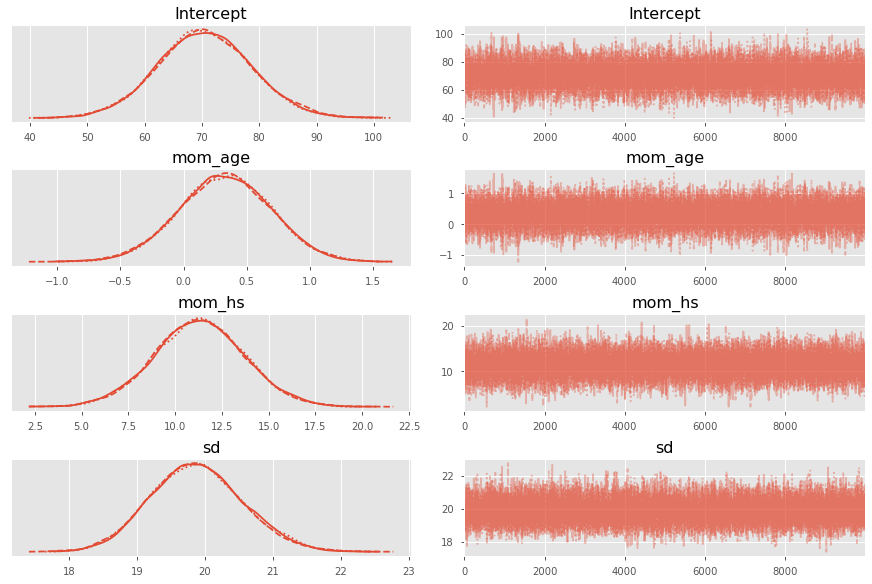

In [44]:
pm.traceplot(trace)

In [45]:
slope_age = trace[:3000]['mom_age'].mean()
slope_hs = trace[:3000]['mom_hs'].mean()
intercept = trace[:3000]['Intercept'].mean()

In [46]:
slope_age

0.32360065301715174

In [47]:
slope_hs

11.273488622410447

This looks like education level has a far larger role than age, and therefore we should only delay age if mothers have not completed highschool

**Note** we cannot do the factor variable in pymc3 in one shot, I suppose we can still graph the two lines

In [50]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('kid_score~mom_age+mom_hs+mom_hs*mom_age', kidiq)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, mom_hs:mom_age, mom_hs, mom_age, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 66 seconds.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3787f3bb0>,
      dtype=object)

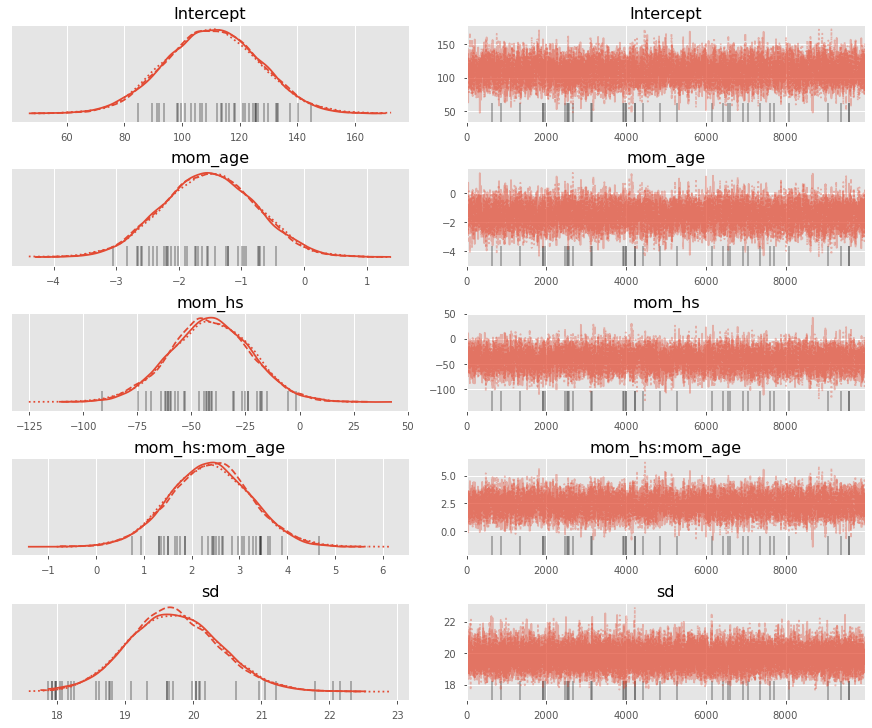

In [51]:
pm.traceplot(trace)

In [54]:
print(trace[:3000]['mom_age'].mean())
print(trace[:3000]['mom_hs'].mean())
print(trace[:3000]['mom_hs:mom_age'].mean())

-1.5072130113547582
-40.736226498282846
2.368298830560705


if hs = 0 then mom_age slope is negative, which means you should have birth as early as possible

if hs = 1 then mom_age slope is -1.5+2.7 = 1.2, so you should have birth as late as possible 

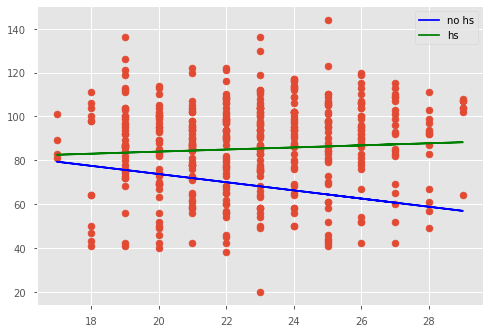

In [59]:
plt.scatter(kidiq['mom_age'], kidiq['kid_score'])
plt.plot(kidiq['mom_age'], trace[:3000]['mom_age'].mean()*kidiq['mom_age']+trace[:3000]['Intercept'].mean(), color='b', label='no hs')
plt.plot(kidiq['mom_age'], (trace[:3000]['mom_age'].mean()+trace[:3000]['mom_hs:mom_age'].mean())*kidiq['mom_age']+trace[:3000]['Intercept'].mean()+trace[:3000]['mom_hs'].mean(), label='hs', color='g')
plt.legend()

This is a very strange way to interpret regressions, contrary to my physics intuitions. The reason why this way is strange is that for some reason we are holding the mother's age as the x axis, instead of thinking about it in a 2D plane where there are influences of education AND age. 

Now fit for the first 200 students and predict for the next 200 students

In [58]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('kid_score~mom_age+mom_hs+mom_hs*mom_age', kidiq[200:])
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, mom_hs:mom_age, mom_hs, mom_age, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 61 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 116 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1422 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7022479696231134, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


In [76]:
new_score = trace[:3000]['mom_age'].mean()*kidiq[200:]['mom_age']+trace[:3000]['mom_hs:mom_age'].mean()*kidiq[200:]['mom_age']*kidiq[200:]['mom_hs']+trace[:3000]['Intercept'].mean()+trace[:3000]['mom_hs'].mean()*kidiq[200:]['mom_hs']

In [77]:
new_score

200    85.344229
201    73.697554
202    88.197990
203    85.344229
204    86.771110
         ...    
429    71.828834
430    85.344229
431    66.222674
432    84.392975
433    86.295483
Length: 234, dtype: float64

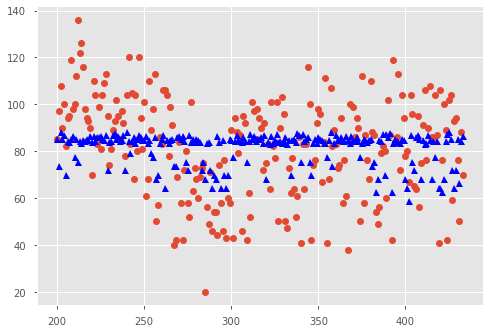

In [83]:
plt.plot(kidiq[200:]['kid_score'], marker='o', linestyle='')
plt.plot(new_score, marker='^', linestyle='', color='b')

There is a lot of variance in the actual data vs the predicted scores. The predicted scores look very averaged out. But this is probably because I am not adding the error term

In [92]:
new_score = trace[:3000]['mom_age'].mean()*kidiq[200:]['mom_age']+trace[:3000]['mom_hs:mom_age'].mean()*kidiq[200:]['mom_age']*kidiq[200:]['mom_hs']+trace[:3000]['Intercept'].mean()+trace[:3000]['mom_hs'].mean()*kidiq[200:]['mom_hs']

In [95]:
err = np.random.normal(0, trace[:3000]['sd'].mean(), len(new_score))
new_score = new_score+err

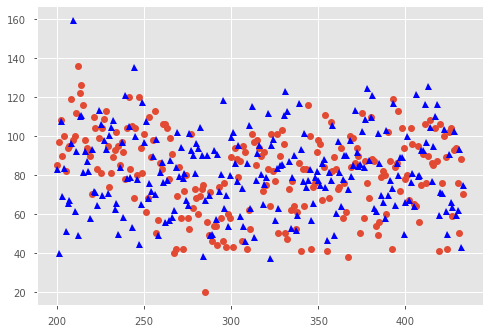

In [96]:
plt.plot(kidiq[200:]['kid_score'], marker='o', linestyle='')
plt.plot(new_score, marker='^', linestyle='', color='b')

There, now the spread looks more like the old data

# 10.6 Regression models with interactions

In [97]:
beauty = pd.read_csv('../ROS-Examples/Beauty/data/beauty.csv')

In [98]:
beauty

,eval,beauty,female,age,minority,nonenglish,lower,course_id
0,4.3,0.201567,1,36,1,0,0,3
1,4.5,-0.826081,0,59,0,0,0,0
2,3.7,-0.660333,0,51,0,0,0,4
3,4.3,-0.766312,1,40,0,0,0,2
4,4.4,1.421445,1,31,0,0,0,0
...,...,...,...,...,...,...,...,...
458,3.2,1.143045,0,32,0,0,1,0
459,4.3,1.143045,0,32,0,0,0,0
460,3.3,0.332051,1,42,1,1,0,0
461,3.2,0.332051,1,42,1,1,0,0


In [101]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('eval~beauty', beauty)
    trace = pm.sample(10000)
pm.trace_to_dataframe(trace[:3000])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, beauty, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 6 seconds.


,Intercept,beauty,sd
0,4.020639,0.121940,0.538950
1,4.033727,0.177819,0.566869
2,4.028751,0.111894,0.561157
3,4.001252,0.191252,0.550047
4,3.993302,0.081591,0.560402
...,...,...,...
8995,4.013109,0.125788,0.558300
8996,4.018258,0.140086,0.545063
8997,3.990261,0.097653,0.570052
8998,4.046179,0.161391,0.522351


In [102]:
trace_df = pm.trace_to_dataframe(trace[:3000])

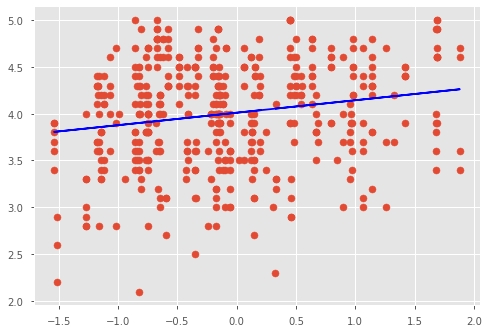

In [107]:
plt.scatter(beauty['beauty'], beauty['eval'])
plt.plot(beauty['beauty'], trace_df['Intercept'].mean()+trace_df['beauty'].mean()*beauty['beauty'], color='b')

In [108]:
trace_df['beauty'].mean()

0.13302616799438735

looks like beauty is correlated with evaluation score. On average, one point increase in beauty means 0.13 increase in evaluation

try some interactions

In [109]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('eval~beauty+female+beauty:female', beauty)
    trace = pm.sample(10000)
trace_df = pm.trace_to_dataframe(trace[:3000])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, beauty:female, female, beauty, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 9 seconds.


In [111]:
trace_df.mean()

Intercept        4.103553
beauty           0.201144
female          -0.205121
beauty:female   -0.113177
sd               0.537456
dtype: float64

if female, eval ~ 0.9beauty, if not female, eval ~ 0.2, seems to suggest that on average, being female would bring about 0.9 increase of eval for every 1 pt increase in beauty, if male, only 0.2

What if it's not an indicator variable? Then for age, we might want to center it because 0 age doesn't mean anything. So we can do something like age - 48

In [112]:
beauty['age'].mean()

48.365010799136066

In [113]:
beauty['scaled_age'] = beauty['age']-48

In [114]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('eval~beauty+scaled_age+beauty:scaled_age', beauty)
    trace = pm.sample(10000)
trace_df = pm.trace_to_dataframe(trace[:3000])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, beauty:scaled_age, scaled_age, beauty, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 8 seconds.


In [115]:
trace_df.mean()

Intercept            4.034345
beauty               0.147846
scaled_age           0.001477
beauty:scaled_age    0.010092
sd                   0.542097
dtype: float64

minimal change it seems. For every increase in beauty, evaluation is barely increased if we move one year older than 48

# 10.7 Predictive simulation for linear regression

a) this one requires native/non_native and age

In [119]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('eval~beauty+nonenglish+age+beauty:nonenglish+beauty:age', beauty)
    trace = pm.sample(10000)
trace_df = pm.trace_to_dataframe(trace[:3000])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, beauty:age, beauty:nonenglish, age, nonenglish, beauty, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 33 seconds.


In [120]:
trace_df.mean()

Intercept            3.983482
beauty              -0.382615
nonenglish          -0.359561
age                  0.001569
beauty:nonenglish    0.097539
beauty:age           0.011082
sd                   0.535929
dtype: float64

In [127]:
# with pm.Model() as model:
#     pm.glm.linear.GLM.from_formula('eval~beauty+nonenglish+age+beauty:nonenglish+beauty:age', beauty)
#     trace = pm.sample(10000)
#     posterior_pred = pm.sample_posterior_predictive(trace, size=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, beauty:age, beauty:nonenglish, age, nonenglish, beauty, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 31 seconds.


MemoryError: Unable to allocate 103. GiB for an array with shape (30000, 1000, 463) and data type float64

skip

# 10.8 How many Simulation Draws -- Skip 

# 10.9 Collinearity

In [6]:
hibbs = pd.read_csv('../ROS-Examples/ElectionsEconomy/data/hibbs.dat', sep=' ')

In [7]:
hibbs

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


In [8]:
hibbs['collinear']=hibbs['growth']*2

In [9]:
hibbs

,year,growth,vote,inc_party_candidate,other_candidate,collinear
0,1952,2.40,44.60,Stevenson,Eisenhower,4.80
1,1956,2.89,57.76,Eisenhower,Stevenson,5.78
2,1960,0.85,49.91,Nixon,Kennedy,1.70
3,1964,4.21,61.34,Johnson,Goldwater,8.42
4,1968,3.02,49.60,Humphrey,Nixon,6.04
5,1972,3.62,61.79,Nixon,McGovern,7.24
6,1976,1.08,48.95,Ford,Carter,2.16
7,1980,-0.39,44.70,Carter,Reagan,-0.78
8,1984,3.86,59.17,Reagan,Mondale,7.72
9,1988,2.27,53.94,"Bush, Sr.",Dukakis,4.54


In [10]:
with pm.Model() as model:
    pm.glm.linear.GLM.from_formula('vote~growth+collinear+growth:collinear', hibbs)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, growth:collinear, collinear, growth, Intercept]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 823 seconds.
There were 2833 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 2277 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.543491254807673, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1168 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


/home/jfyu/miniconda3/envs/ros/lib/python3.8/site-packages/arviz/data/io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19f14ec430>,
      dtype=object)

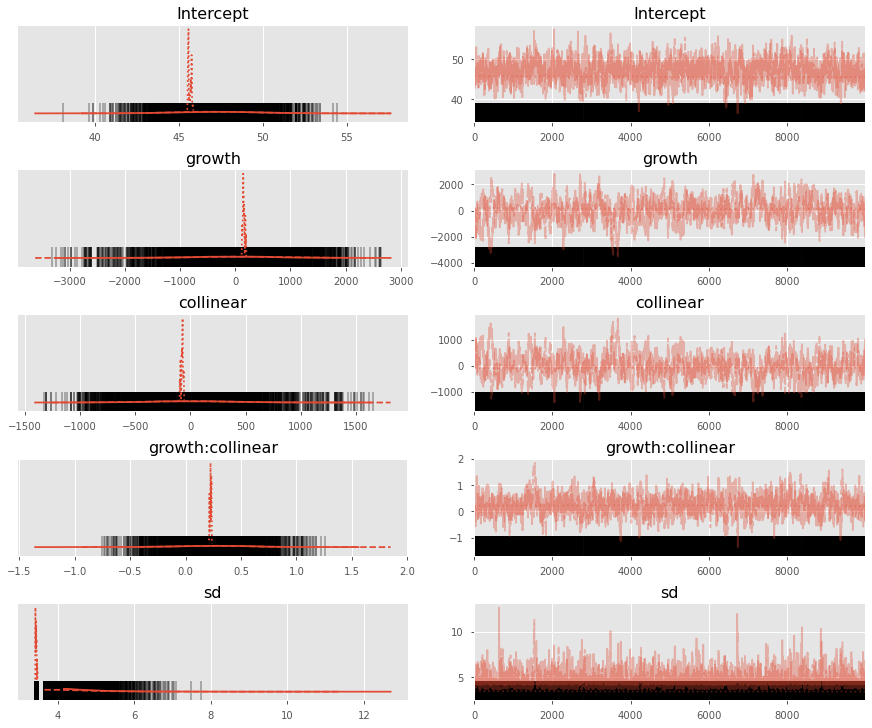

In [11]:
pm.traceplot(trace)

Did not converge.........................